In [ ]:
import zipfile
import os
#Define the path to the zip file and the extraction directory
zip_file_path="/content/drive/MyDrive/archive.zip"
extract_dir = "/content"

#Check if the zip file exists
if os.path.exists(zip_file_path):
    # Indent the code block within the 'if' statement
    try:
        #Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            #Extract all contents to the specified directory
            zip_ref.extractall(extract_dir) # Changed {extract_dir} to (extract_dir)

            print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")

    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}'is not a valid zip file.")

    except Exception as e:
        print(f"An error occurred: '{e}'")

else:
    print(f"Error: '{zip_file_path}' does not exist.")

Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2
import glob
import tensorflow as tf


In [ ]:
# from tensorflow.keras.application.mobilenet_v2 import preprocess_input

In [ ]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [ ]:
size=224

In [ ]:
 train_generator=tf.keras.preprocessing.image.ImageDataGenerator(

rotation_range=90,

width_shift_range=0.0,

height_shift_range=0.0,

shear_range=0.0,

zoom_range=0.0,

horizontal_flip=False,

vertical_flip=False,

rescale=1/255.0,

preprocessing_function=None,

validation_split=0.1,

).flow_from_directory (train,

batch_size=164,

target_size=(size,size),

subset="training",


color_mode='rgb', #"rgb", "rgba", or "grayscale"

class_mode='categorical', # Use 'binary', 'sparse', 'categorical' or None as needed

shuffle=True)

Found 63282 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
valid_generator=tf.keras.preprocessing.image. ImageDataGenerator(

rescale=1/255.0,

preprocessing_function=None,

validation_split=0.1,

).flow_from_directory(valid,

batch_size=164,

target_size=(224,224),

subset='validation',

color_mode='rgb', #"rgb", "rgba", or "grayscale"

class_mode='categorical', # Use 'binary', 'sparse', 'categorical' or None as needed

shuffle=False)

Found 1742 images belonging to 38 classes.


In [ ]:
from tensorflow import keras

model=keras.models.Sequential() # To build NN

model.add(keras.layers.Conv2D (filters=32, kernel_size=7, strides=1,

padding="same", activation="relu", name="Conv1", input_shape=(224,224,3)))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D (filters=64, kernel_size=5, strides=1,



padding="same", activation="relu", name="Conv2"))

model.add(keras.layers.MaxPool2D (pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D (filters=128, kernel_size=3, strides=1,

padding="same", activation="relu", name="Conv3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1,

padding="same", activation="relu", name="Conv4"))

model.add(keras.layers.MaxPool2D (pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten (name="Flatten1")) #flatten layer to convert into 1d vector

model.add(keras.layers. Dense (128, activation="relu", name="Dense1"))

#hidden layer

tf.keras.layers. Dropout(0.5)
model.add(keras.layers.Dense (64, activation="relu", name="Dense2"))

#hidden layer

tf.keras.layers. Dropout(0.5)

model.add(keras.layers.Dense (38, activation="softmax", name="output"))

#outpu layer
#this model's summary() method displays all the model's layers
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping (monitor='val_loss', patience=15, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROPlateau = ReduceLROnPlateau (monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROPlateau]

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','precision','recall'])

In [ ]:
history =  model.fit (train_generator,
                  epochs=   5,
                  validation_data=valid_generator,
                  callbacks=callbacks)

NameError: name 'model' is not defined

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.models.Sequential()  # To build NN
model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding="same", activation="relu", name="Conv1", input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu", name="Conv3"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu", name="Conv4"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))
model.add(keras.layers.Flatten(name="Flatten1"))  # flatten layer to convert into 1d vector
model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))
# hidden layer
tf.keras.layers.Dropout(0.5)  # Dropout layer is not added to the model
model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))
# hidden layer
tf.keras.layers.Dropout(0.5)  # Dropout layer is not added to the model
model.add(keras.layers.Dense(38, activation="softmax", name="output"))
# output layer

# Print model summary
print(model.summary())

# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
model_ReduceLROPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks = [early_stopping, model_checkpoint, model_ReduceLROPlateau]

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# Fit the model
history = model.fit( train_generator,
                    epochs=5,
                    validation_data=valid_generator,
                    callbacks=callbacks)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


NameError: name 'train_generator' is not defined

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.models.Sequential()  # To build NN
model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding="same", activation="relu", name="Conv1", input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu", name="Conv3"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu", name="Conv4"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))
model.add(keras.layers.Flatten(name="Flatten1"))  # flatten layer to convert into 1d vector
model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))
# hidden layer
tf.keras.layers.Dropout(0.5)  # Dropout layer is not added to the model
model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))
# hidden layer
tf.keras.layers.Dropout(0.5)  # Dropout layer is not added to the model
model.add(keras.layers.Dense(38, activation="softmax", name="output"))
# output layer

# Print model summary
print(model.summary())

# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
model_ReduceLROPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks = [early_stopping, model_checkpoint, model_ReduceLROPlateau]

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# Fit the model
history = model.fit( train_generator,
                    epochs=5,
                    validation_data=valid_generator,
                    callbacks=callbacks)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


386/386 ━━━━━━━━━━━━━━━━━━━━ 926s 2s/step - accuracy: 0.2299 - loss: 2.7824 - precision: 0.6613 - recall: 0.0886 - val_accuracy: 0.5792 - val_loss: 1.3935 - val_precision: 0.7502 - val_recall: 0.4311 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 834s 2s/step - accuracy: 0.6733 - loss: 1.0592 - precision: 0.8050 - recall: 0.5530 - val_accuracy: 0.7692 - val_loss: 0.7380 - val_precision: 0.8551 - val_recall: 0.7078 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 825s 2s/step - accuracy: 0.8037 - loss: 0.6169 - precision: 0.8683 - recall: 0.7475 - val_accuracy: 0.8008 - val_loss: 0.6396 - val_precision: 0.8507 - val_recall: 0.7623 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 860s 2s/step - accuracy: 0.8585 - loss: 0.4379 - precision: 0.8969 - recall: 0.8262 - val_accuracy: 0.8691 - val_loss: 0.4082 - val_precision: 0.8963 - val_recall: 0.8485 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 814s 2s/step - accuracy: 0.8926 - l

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

# ... (rest of your model definition) ...

# Define the train_generator
train_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'  # Replace with your train directory
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(
    train_dir,
    batch_size=164,
    target_size=(size, size),
    subset="training",
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Define the valid_generator
valid_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'  # Replace with your valid directory
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(
    valid_dir,
    batch_size=164,
    target_size=(224, 224),
    subset='validation',
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# ... (rest of your code, including model.fit) ...

Found 63282 images belonging to 38 classes.
Found 1742 images belonging to 38 classes.


In [ ]:
import seaborn as sns
sns.set()
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

precision=history.history['precision']
val_precision=history.history['val_precision']

recall=history.history['recall']
val_recall=history.history['val_recall']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

In [ ]:
plt.plot (epochs,acc,color='green',label='Training Accuracy')
plt.plot(epochs,val_acc,color='red',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.ylim(0,1.02)
plt.show()

NameError: name 'plt' is not defined

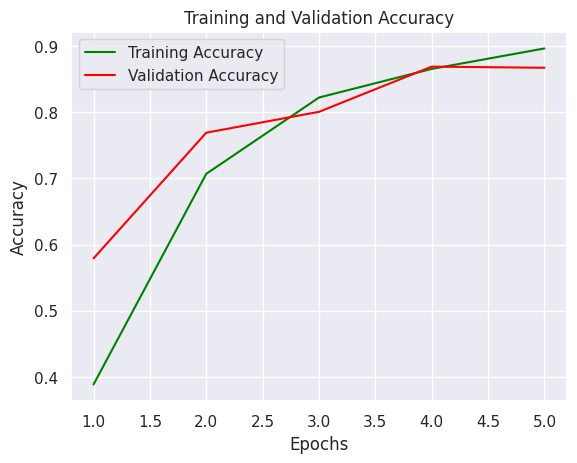

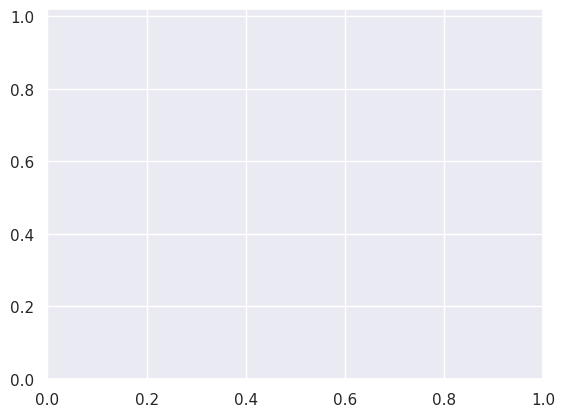

In [ ]:
import matplotlib.pyplot as plt #Import the matplotlib.pyplot module
import seaborn as sns
sns.set()
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

precision=history.history['precision']
val_precision=history.history['val_precision']

recall=history.history['recall']
val_recall=history.history['val_recall']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)


plt.plot (epochs,acc,color='green',label='Training Accuracy') #Use the plt object to generate the plots
plt.plot(epochs,val_acc,color='red',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.ylim(0,1.02)
plt.show()

In [ ]:
model_evaluate= model.evaluate(test_generator)
print(f"Test Loss: {model_evaluate[0]}")
print(f"Test Accuracy: {model_evaluate[1]}")
print(f"Test Precision: {model_evaluate[2]}")
print(f"Test Recall: {model_evaluate[3]}")

NameError: name 'test_generator' is not defined

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

# ... (rest of your model definition) ...

# Define the train_generator
# ... (your existing train_generator code) ...

# Define the valid_generator
# ... (your existing valid_generator code) ...

# Define the test_generator
test_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'  # Replace with your test directory
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(
    test_dir,
    batch_size=164,  # Adjust batch size as needed
    target_size=(224, 224),
    shuffle=False,  # Important for consistent evaluation
    class_mode='categorical'  # Match the class mode used during training
)

# Evaluate the model
model_evaluate = model.evaluate(test_generator)
print(f"Test Loss: {model_evaluate[0]}")
print(f"Test Accuracy: {model_evaluate[1]}")
print(f"Test Precision: {model_evaluate[2]}")
print(f"Test Recall: {model_evaluate[3]}")

Found 17572 images belonging to 38 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 381ms/step - accuracy: 0.8939 - loss: 0.3319 - precision: 0.9159 - recall: 0.8770
Test Loss: 0.3678184449672699
Test Accuracy: 0.8807762265205383
Test Precision: 0.9069655537605286
Test Recall: 0.8588094711303711


In [1]:
model.save('CNN_plantdisease_model.keras')

NameError: name 'model' is not defined